In [1]:
import pandas as pd 

# Read Price Data Excel file
df_price = pd.read_excel('./data_sources/Price Data.xlsx')
df_price = df_price[['DateValueCET', 'TimeValueCET', 'PowerPriceAreaCode', 'PriceMWh']]
df_price['DateTime'] = pd.to_datetime((df_price['DateValueCET']).astype(str) + ' ' + (df_price['TimeValueCET']).astype(str), format='%Y-%m-%d %H:%M:%S')
df_price['DateTime'] = pd.to_datetime(df_price['DateTime'], format='%Y-%m-%d %H:%M:%S')
df_price['Year'] = df_price['DateTime'].dt.year
df_price.head()

,DateValueCET,TimeValueCET,PowerPriceAreaCode,PriceMWh,DateTime,Year
0,2024-09-12,04:00:00,BRAZIL_NORTH,286.29,2024-09-12 04:00:00,2024
1,2024-09-12,04:00:00,BRAZIL_NORTHEAST,286.24,2024-09-12 04:00:00,2024
2,2024-09-12,04:00:00,BRAZIL_SOUTH,286.28,2024-09-12 04:00:00,2024
3,2024-09-12,04:00:00,BRAZIL_SOUTHEAST_CENTRALWEST,286.28,2024-09-12 04:00:00,2024
4,2024-09-12,03:00:00,BRAZIL_NORTH,304.05,2024-09-12 03:00:00,2024


In [2]:
import pandas as pd
import numpy as np

# Assume df_price is your dataset
# Create a 'day_of_week' feature
df_price['day_of_week'] = df_price['DateTime'].dt.dayofweek  # Monday=0, Sunday=6

# Cyclical encoding for hour
df_price['hour_sin'] = np.sin(2 * np.pi * df_price['DateTime'].dt.hour / 24)
df_price['hour_cos'] = np.cos(2 * np.pi * df_price['DateTime'].dt.hour / 24)

# Cyclical encoding for day of year
df_price['day_of_year'] = df_price['DateTime'].dt.dayofyear
df_price['day_sin'] = np.sin(2 * np.pi * df_price['day_of_year'] / 365)
df_price['day_cos'] = np.cos(2 * np.pi * df_price['day_of_year'] / 365)

# Optionally: binary feature for weekend
df_price['is_weekend'] = df_price['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

df_price.head()

,DateValueCET,TimeValueCET,PowerPriceAreaCode,PriceMWh,DateTime,Year,day_of_week,hour_sin,hour_cos,day_of_year,day_sin,day_cos,is_weekend
0,2024-09-12,04:00:00,BRAZIL_NORTH,286.29,2024-09-12 04:00:00,2024,3,0.866025,0.500000,256,-0.953681,-0.30082,0
1,2024-09-12,04:00:00,BRAZIL_NORTHEAST,286.24,2024-09-12 04:00:00,2024,3,0.866025,0.500000,256,-0.953681,-0.30082,0
2,2024-09-12,04:00:00,BRAZIL_SOUTH,286.28,2024-09-12 04:00:00,2024,3,0.866025,0.500000,256,-0.953681,-0.30082,0
3,2024-09-12,04:00:00,BRAZIL_SOUTHEAST_CENTRALWEST,286.28,2024-09-12 04:00:00,2024,3,0.866025,0.500000,256,-0.953681,-0.30082,0
4,2024-09-12,03:00:00,BRAZIL_NORTH,304.05,2024-09-12 03:00:00,2024,3,0.707107,0.707107,256,-0.953681,-0.30082,0


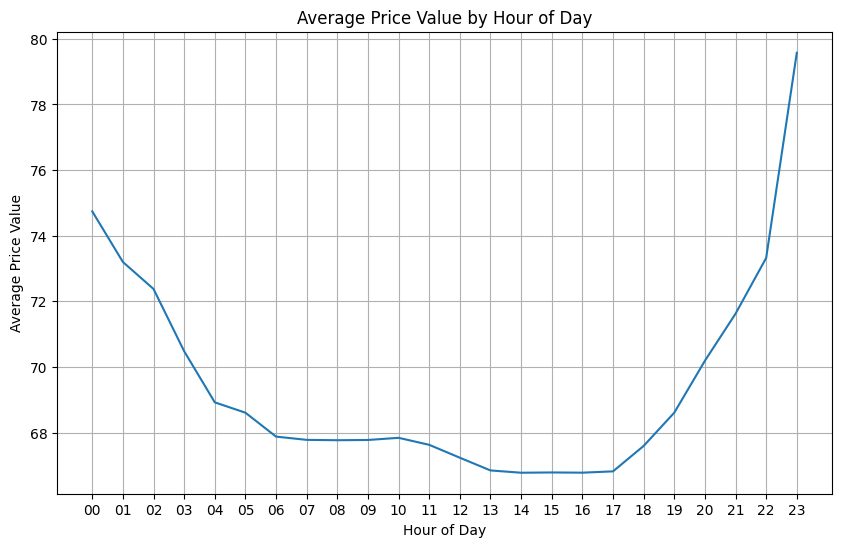

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'hour' is a feature and 'Price' is the variable you're interested in
df_price['Hour'] = df_price['TimeValueCET'].str[:2]
hourly_avg = df_price.groupby('Hour')['PriceMWh'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values)
plt.title('Average Price Value by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price Value')
plt.grid(True)
plt.show()


In [4]:
# plt.figure(figsize=(10, 6))
# plt.plot(df_price['Hour'], df_price['hour_sin'], label='hour_sin', color='b')
# plt.plot(df_price['Hour'], df_price['hour_cos'], label='hour_cos', color='r')
# plt.title('Cyclic Encoding of Hour Feature')
# plt.xlabel('Hour of Day')
# plt.ylabel('Price')
# plt.legend()
# plt.grid(True)
# plt.show()


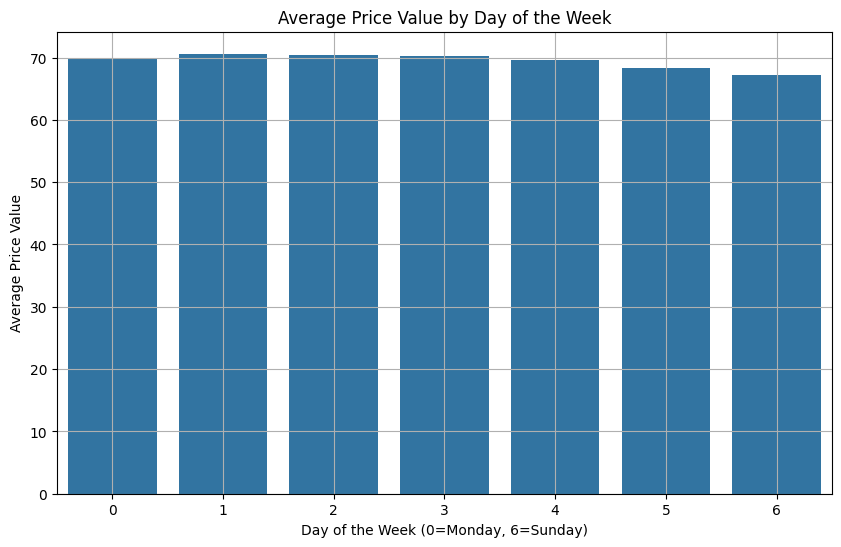

In [5]:
day_avg = df_price.groupby('day_of_week')['PriceMWh'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=day_avg.index, y=day_avg.values)
plt.title('Average Price Value by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Price Value')
plt.grid(True)
plt.show()


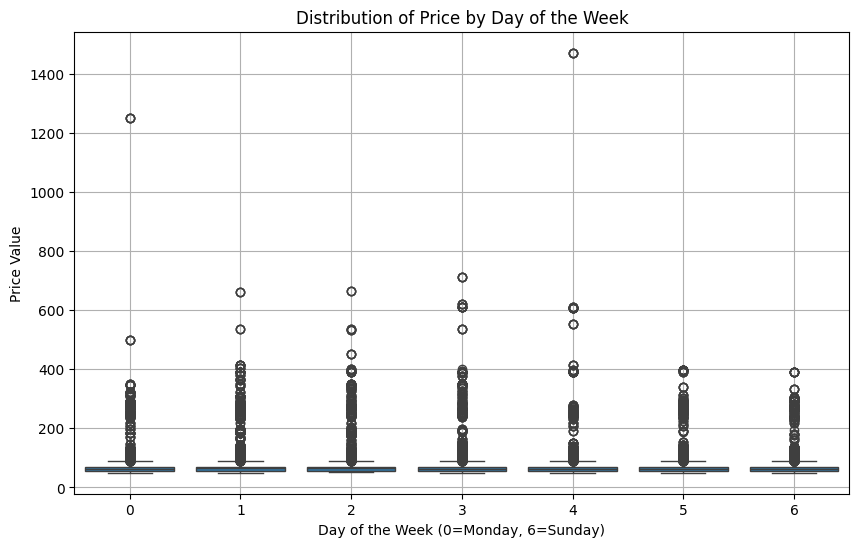

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='PriceMWh', data=df_price)
plt.title('Distribution of Price by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Price Value')
plt.grid(True)
plt.show()


In [7]:
# plt.figure(figsize=(10, 6))
# plt.plot(df_price['day_of_year'], df_price['day_sin'], label='day_sin', color='b')
# plt.plot(df_price['day_of_year'], df_price['day_cos'], label='day_cos', color='r')
# plt.title('Cyclic Encoding of Day of Year')
# plt.xlabel('Day of Year')
# plt.ylabel('Value')
# plt.legend()
# plt.grid(True)
# plt.show()


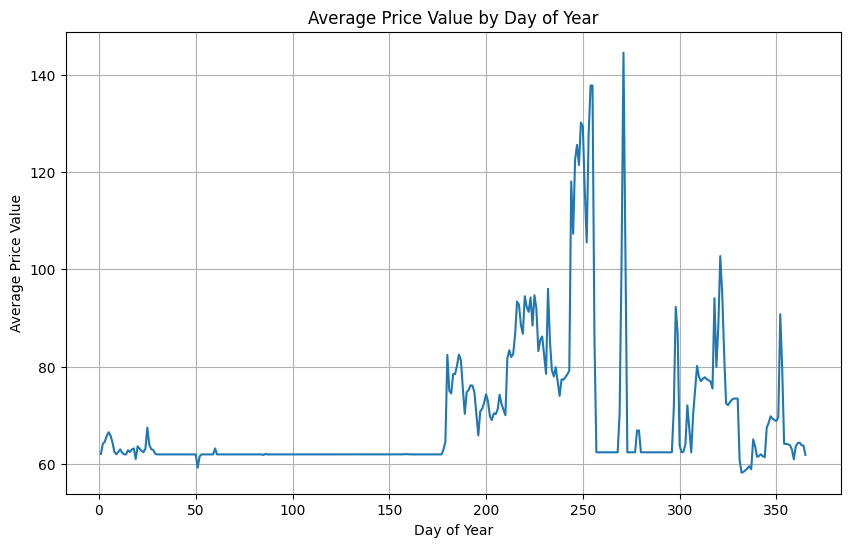

In [8]:
day_year_avg = df_price.groupby('day_of_year')['PriceMWh'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=day_year_avg.index, y=day_year_avg.values)
plt.title('Average Price Value by Day of Year')
plt.xlabel('Day of Year')
plt.ylabel('Average Price Value')
plt.grid(True)
plt.show()


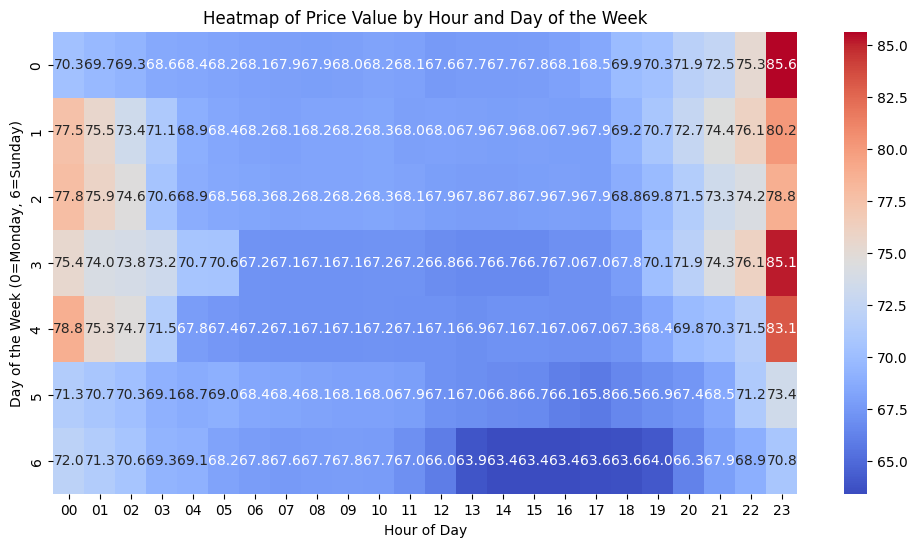

In [9]:
# Pivot data to create a matrix for heatmap
heatmap_data = df_price.pivot_table(index='day_of_week', columns='Hour', values='PriceMWh', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Heatmap of Price Value by Hour and Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of the Week (0=Monday, 6=Sunday)')
plt.show()


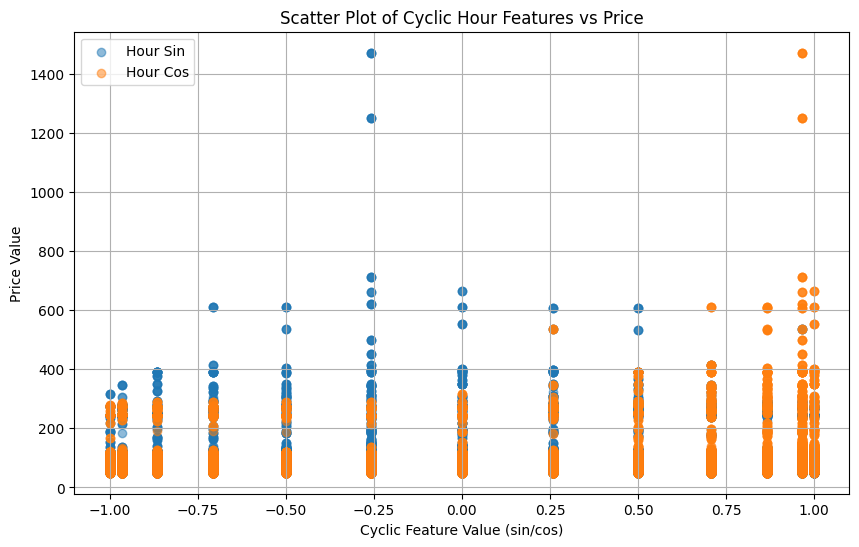

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df_price['hour_sin'], df_price['PriceMWh'], label='Hour Sin', alpha=0.5)
plt.scatter(df_price['hour_cos'], df_price['PriceMWh'], label='Hour Cos', alpha=0.5)
plt.title('Scatter Plot of Cyclic Hour Features vs Price')
plt.xlabel('Cyclic Feature Value (sin/cos)')
plt.ylabel('Price Value')
plt.legend()
plt.grid(True)
plt.show()
